## Этап 1. Знакомство с данными

Импортируем необходиме библиотеки.

In [3]:
import pandas as pd 
import seaborn 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st

Читаем файл, выводим первые 5 строк.

In [79]:
data = pd.read_csv('games.csv') 
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Этап 2. Подготовка данных

Проверим данные на наличие дубликатов, корректность типов данных, заменим названия столбцов и обработаем пропуски.

В названиях столбцов есть заглавные буквы -- избавимся от них.

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.duplicated().sum() 

0

Дубликатов нет.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что в некоторых столбцах неверный тип данных и пропущены значения.

Посмотрим на строки с пропущенными названиями игр.

In [8]:
data[data['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры без имени и жанра. Думаю, эти строки можно удалить.

In [9]:
data = data.dropna(subset=['name'])

Посмотрим на данные года выпуска и посчитаем долю пропусков.

In [10]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [11]:
data['year_of_release'].isnull().sum() / data.shape[0]

0.016095255190570215

В данном проекте необходимо определить актуальный период, на основании которого мы и будем делать прогнозы на 2017 год. Соответственно, мы все равно будем сокращать датасет, фильтруя по году релиза, и для прогноза на 2017 год мы их явно учитывать не будем, поэтому удаляем.

In [12]:
data = data.dropna(subset=['year_of_release']) 

Рассмотрим уникальные значения с рейтингом пользователей.

In [13]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Есть пропуски и есть значение 'tbd' (To Be Determined -- будет определено). Заменим и то, и другое.

In [14]:
data['user_score'] = data['user_score'].replace({'tbd':np.NaN})


In [15]:
data['user_score'].sort_values().unique() # проверяем

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

Оставим эти пропуски. Рассмотрим уникальные значения рейтинга критиков.

In [16]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Оставим эти пропуски. Они не помешают дальнейшему анализу. Посмотрим на значения столбца 'rating'.

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски значением 'unnown'.

In [18]:
data.loc[data['rating'].isnull(), 'rating'] = 'unknown'

Произведем замену типов данных в следубщих столбцах:
- year_of_release -- год должен быть целым, 
- user_score -- рейтинг должен быть дробным числом.

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int') 

In [20]:
data['user_score'] = data['user_score'].astype('float')

Проверим результат замены пропусков и типов данных.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Создадим новый столбец с суммарными продажами по всем регионам.

In [22]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Пропуски в столбце с возрастным рейтингом отсутствуют по причине того, что этот рейтинг только для региона Северной Америки, для остальных регионов он просто не предполагается. Пропуски в названии игр появились, скорее всего, из-за человеческой ошибки. 

## Этап 3. Исследовательский анализ

Посмотрим на распределение количества игр в разные годы. Построим сводную таблицу 

In [23]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index() 

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Рассмотрим это распределение игр на графике.

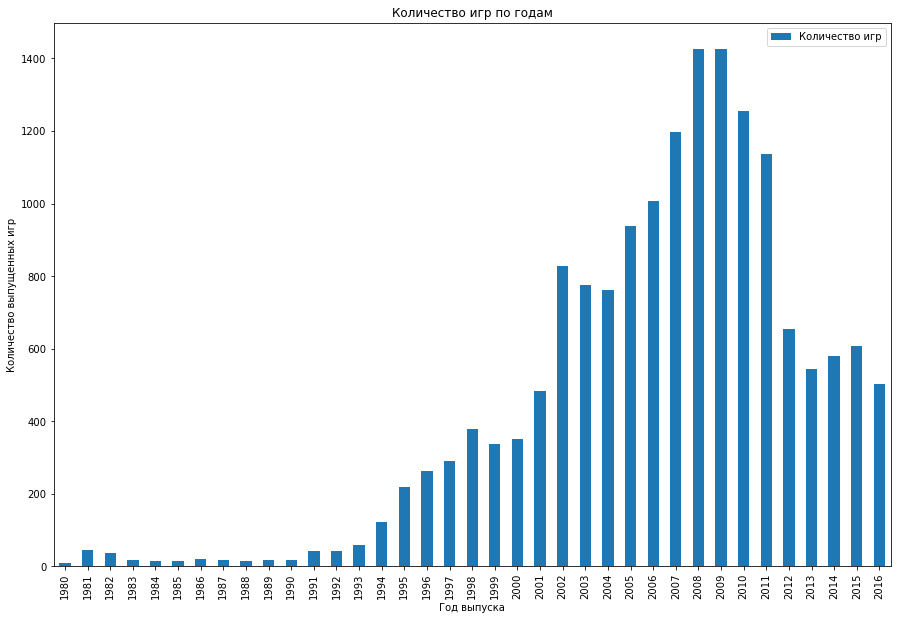

In [24]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count') \
.plot(kind='bar', figsize=(15, 10)).set_title('Количество игр по годам')
plt.legend(labels= ['Количество игр'])
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Год выпуска')
plt.show()

Видим значительный рост выпущенных игр с середины 90-х, также резкий рост был в 2002 году, и продолжался рост до 2008 года, потом данные идут на спад. С 2012 года выпускать игры стали почти в два раза меньше. Гугл подсказывает, что это связано с мировым кризисом 2008 года. Один из крупных издателей игр THQ в 2012 обанкротился.

### Проведем анализ продаж по платформам: платформы с наибольшими суммарными продажами, график распределения по годам, срок появления новых и исчезновения старых платформ.

Построим сводную таблицу по каждой платформе по суммарным продажам по убыванию и график распределения.

In [25]:
data_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                .sort_values(by='total_sales', ascending=False).reset_index()
data_platform.index = np.arange(1, len(data_platform)+1) # нумерация индексов с '1'
data_platform.head()

,platform,total_sales
1,PS2,1233.56
2,X360,961.24
3,PS3,931.34
4,Wii,891.18
5,DS,802.78


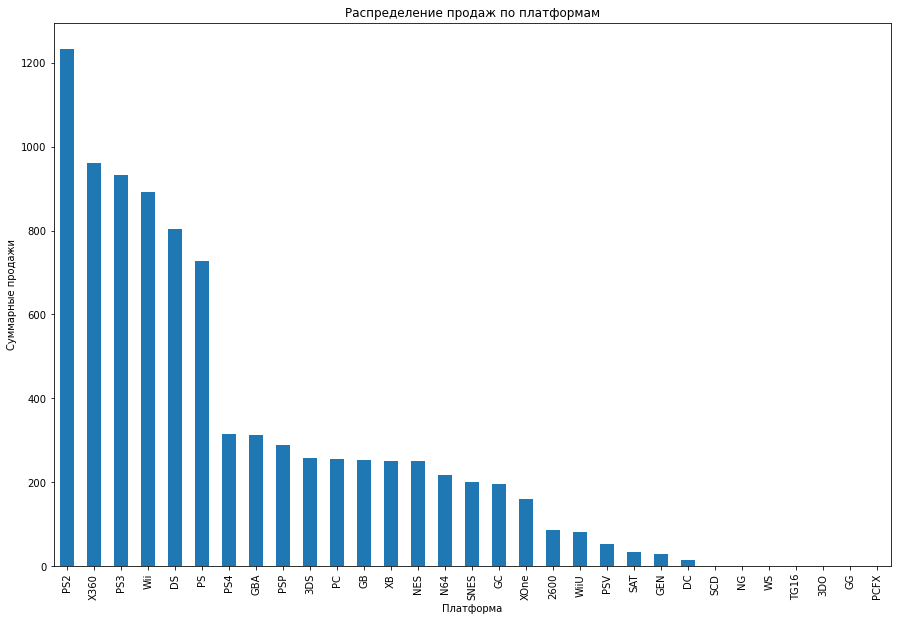

In [26]:
data_platform.plot(x='platform', y='total_sales', kind='bar', figsize=(15, 10), legend=False).set_title('Распределение продаж по платформам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформа')
plt.show()

Создадим список платформ с наибольшими продажами. Предлагаю взять первые 6 платформ.

In [27]:
top_platforms = data_platform['platform'].head(6)
top_platforms

1     PS2
2    X360
3     PS3
4     Wii
5      DS
6      PS
Name: platform, dtype: object

С помощью цикла построим графики, чтобы посмотреть, как менялись продажи по платформам (топ-6). Для красоты для каждого графика посчитаем своё количество корзин.

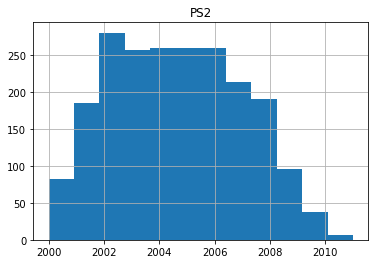

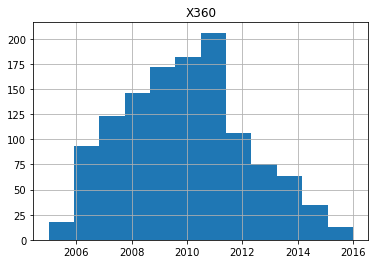

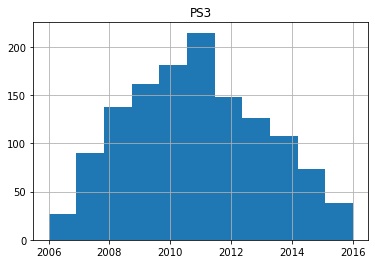

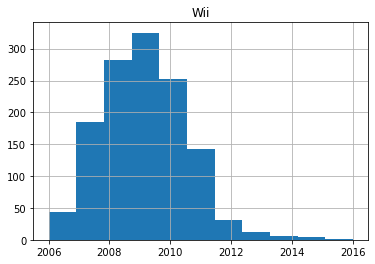

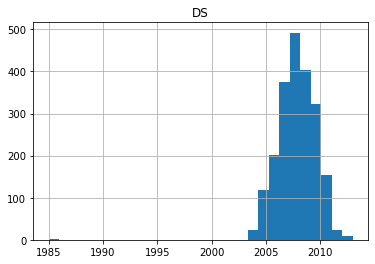

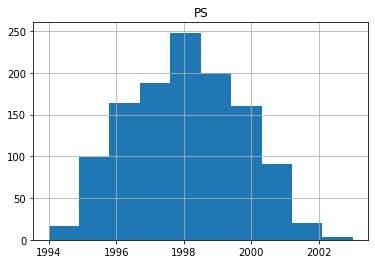

In [28]:
for i in top_platforms:
    b = data[(data['platform'] == i) & (data['year_of_release'] != 0)]['year_of_release'].max() \
        - data[(data['platform'] == i) & (data['year_of_release'] != 0)]['year_of_release'].min() + 1
    data[(data['platform'] == i) & (data['year_of_release'] != 0)].hist('year_of_release', bins=b)
    plt.title(i)

Смущает график для платформы DS -- выделяется 1985 год. Гугл говорит, что DS была выпущена в 2004 году. Значит, данные про 1985 ошибочные. Предлагаю удалить их:

In [29]:
data = data.drop(index=data.index[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)].tolist())

Построим сводную таблицу с данными общих продаж для самых популярных платформ в разрезе по годам.

In [30]:
top_platforms_years = data.query('platform in @top_platforms').groupby(['platform', 'year_of_release']) \
.agg(total_sale=('total_sales', 'sum')).reset_index() 
top_platforms_years

,platform,year_of_release,total_sale
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,146.94
4,DS,2008,145.31
...,...,...,...
61,X360,2012,99.74
62,X360,2013,88.58
63,X360,2014,34.74
64,X360,2015,11.96


Построим график распределения продаж по топ-6 платформам и годам:

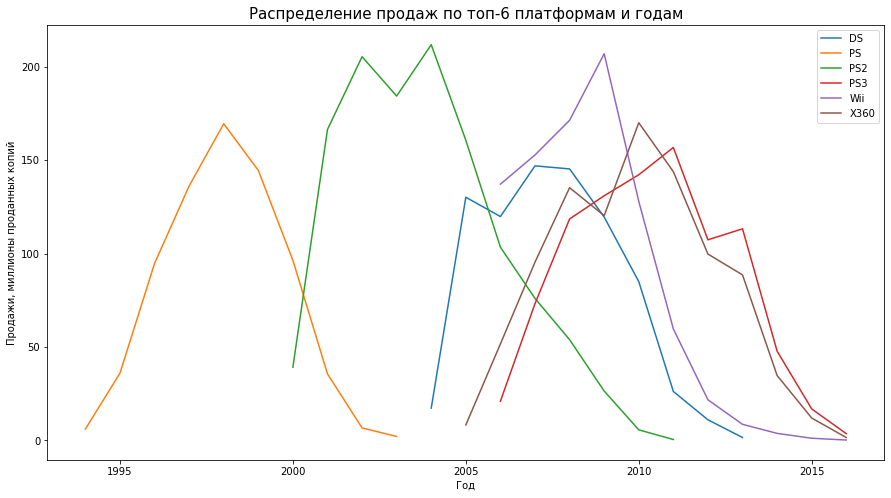

In [31]:
line,ax = plt.subplots(figsize=(15, 8))
seaborn.set_style({'axes.grid': True})
ax = seaborn.lineplot(x='year_of_release', y='total_sale', data=top_platforms_years, hue='platform')
ax.set_title('Распределение продаж по топ-6 платформам и годам', fontsize=15)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, миллионы проданных копий')
ax.legend(loc='upper right')
plt.show()

Чтобы ответить на впопрос, за какой характерный срок появляются новые и исчезают старые платформы, построим хитмэп.

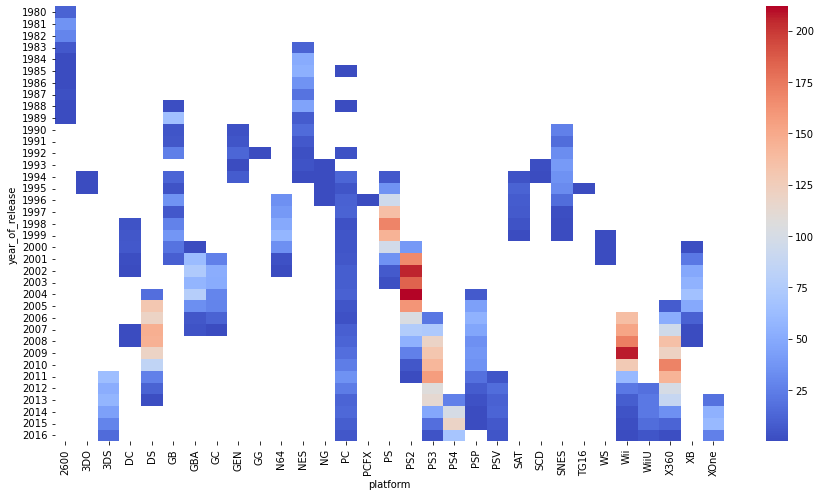

In [32]:
plt.figure(figsize = (15,8))
seaborn.heatmap(data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum'), cmap='coolwarm')
plt.show()

Итак, платформы с лучшими продажами это: PS, PS2, PS3, PSP, DS, Wii, X360 и PC. В среднем популярные платформы "живут" около 10 лет: в течение 5 лет наблюдается рост, затем продажи идут на спад. На примере PS хорошо видно, как рост и падение популярности связаны с выходом новой версии. Другая ситуация с РС: он стабильно популярен много лет (нет таких объемов продаж в короткий период, как у приставок, зато продажи всегда есть из года в год), у него нет разных версий, его можно обновить, в отличие от приставки. 

### Определение актуального периода.

Учитывая предыдущий вывод, за актуальный период для планирования продаж на 2017 год возмем последние три полных года. 
В дальнейшей работе будем использовать только его. Обновим основную таблицу с данными.

In [33]:
data = data.query('year_of_release >= 2013')

Рассмотрим, какие платформы лидируют по продажам, растут или падают. Выберем нескольких потенциально прибыльных платформ. Построим сводную таблицу (уже по актуальному периоду) для общих продаж в разрезе по платформам и годам.

In [34]:
platforms_years = data.query('year_of_release != 0').groupby(['platform', 'year_of_release']) \
                  .agg(total_sale=('total_sales', 'sum')).reset_index() 
platforms_years.head()

,platform,year_of_release,total_sale
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54


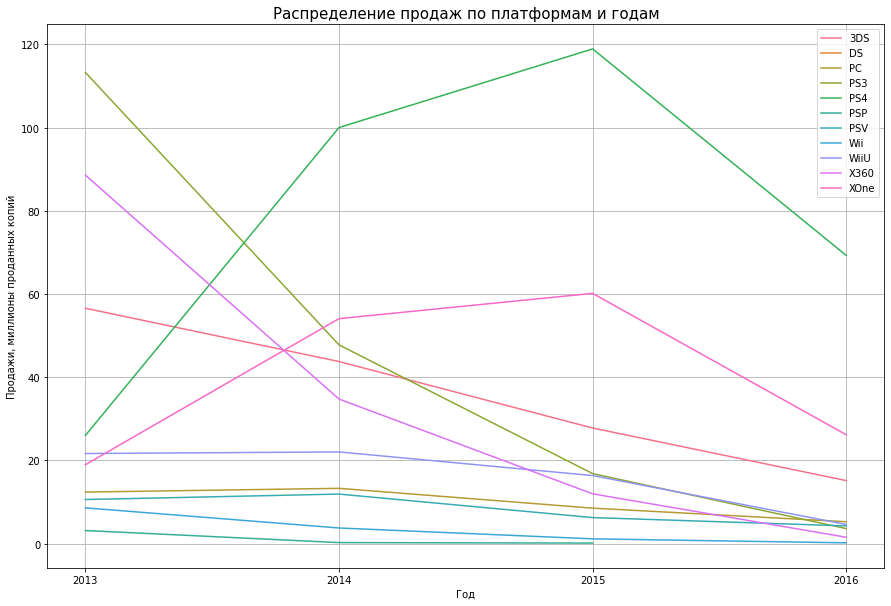

In [35]:
line,ax = plt.subplots(figsize=(15, 10))
seaborn.set_style({'axes.grid': True})
ax = seaborn.lineplot(x='year_of_release', y='total_sale', data=platforms_years, hue='platform')
ax.set_title('Распределение продаж по платформам и годам', fontsize=15)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, миллионы проданных копий')
ax.legend(loc='upper right')
plt.xticks(np.arange(2013, 2017, 1))
plt.show()

Данные за 2016 неполные. Из-за этого по графику может показаться, что продажи на всех платформах падают. Построим график по данным без учета 2016 года.

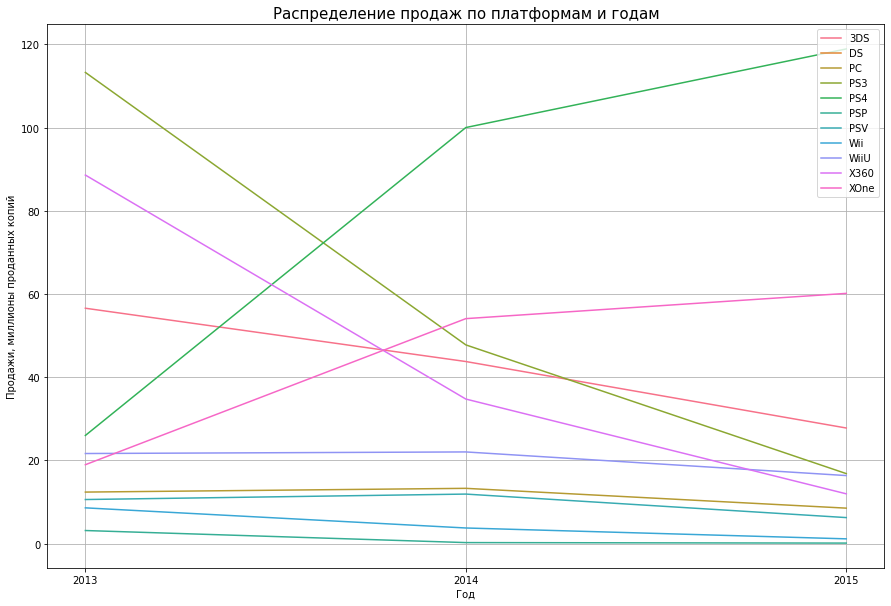

In [36]:
line,ax = plt.subplots(figsize=(15, 10))
seaborn.set_style({'axes.grid': True})
ax = seaborn.lineplot(x='year_of_release', y='total_sale', data=platforms_years.query('year_of_release < 2016'), hue='platform')
ax.set_title('Распределение продаж по платформам и годам', fontsize=15)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, миллионы проданных копий')
ax.legend(loc='upper right')
plt.xticks(np.arange(2013, 2016, 1))
plt.show()

Теперь видно, что растут продажи игр на платформах PS4 и XOne, наблюдается падение на платформах PS3 и Х360. У остальных платформ снижение продаж не такое резкое.
Лидируют по продажам за период 2013-2016 платформы PS4, XOne, X360 и 3DS.
В качестве потенциально прибыльных платформ предлагаю выбрать следующие: PS4 и XOne (рост продаж, лидеры по продажам, недавно вышедшие), 3DS (тоже в топе по продажам и относительно новая) и РС ("нестареющая классика": продажи небольшие, но стабильные на протяжении многих лет). Платформы PS3 и Х360 хоть и в топе по общим продажам, но им на смену уже пришли обновленные версии, соответственно, их продажи будут падать.

In [37]:
best_platforms = ['PS4', 'XOne', '3DS', 'PC']

In [38]:
data_best_platforms = data.query('platform in @best_platforms') # общие данные для таких платформ

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам. 

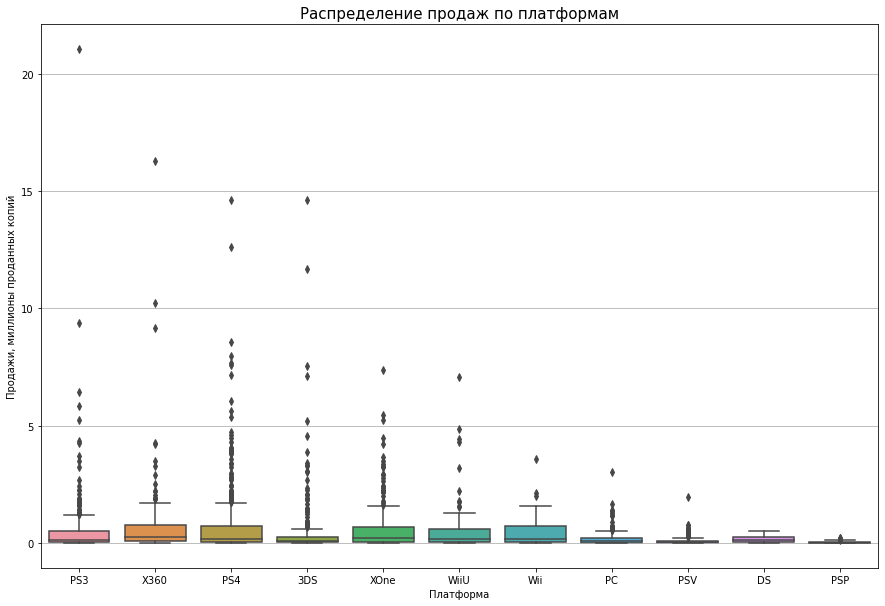

In [39]:
line,ax = plt.subplots(figsize=(15, 10))
seaborn.boxplot(x='platform', y='total_sales', data=data)
ax.set_title('Распределение продаж по платформам', fontsize=15)
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, миллионы проданных копий')
plt.show()

Из-за выбросов трудно рассмотреть описательные статистики. "Приблизим" график:

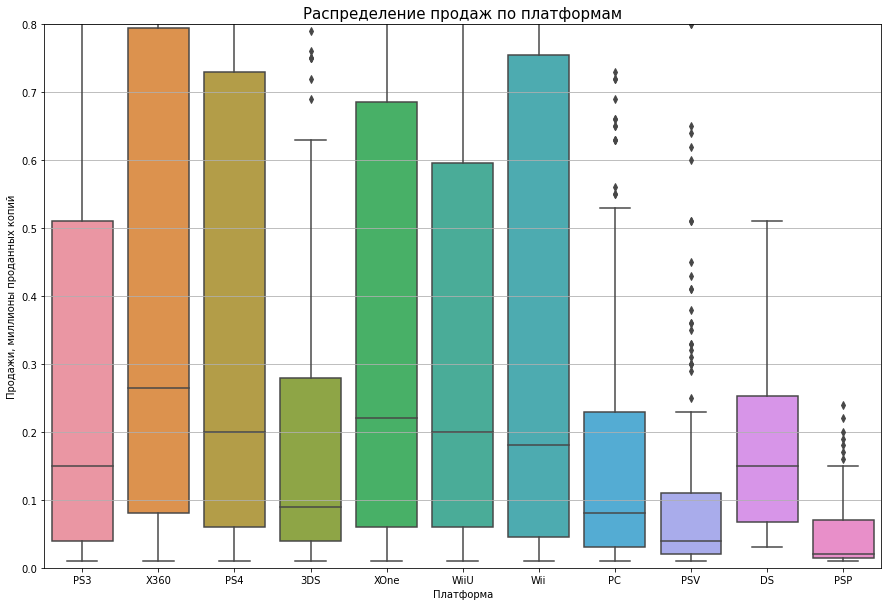

In [40]:
line,ax = plt.subplots(figsize=(15, 10))
seaborn.boxplot(x='platform', y='total_sales', data=data)
ax.set_title('Распределение продаж по платформам', fontsize=15)
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, миллионы проданных копий')
plt.ylim(0,0.8)
plt.show()

In [41]:
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Наименьший размах наблюдается у портативных консолей (PSV, PSP, DS и 3DS) и PC. Среднее и медиана у них тоже ниже остальных. Видимо, портативные консоли менее популярны. А вот стационарный компьютер есть почти у всех, тем не менее игры на нем продаются меньше, скорее всего, по причине пиратства -- скачал и играй.

Максимальная медиана у платформы X360, а среднее - у PS4. Самые продаваемые игры на платформах из нашего списка наиболее потенциально прибыльных платформ. 

Интересное наблюдение по платформе Wii: ее межквартильный размах довольно большой, медиана на уровне других прибыльных платформ, но она не входит в топ самых прибыльных платформ. Думаю, дело в небольших выбросах по сравнению с другими платформами. На других популярных платформах есть игры, которые "выстрелили" -- количество проданных копий очень большое. За счет этого общие продажи выше.

Все распределения правосторонние: среднее больше медианы. Это значит, что "больших" продаж было больше, чем "маленьких".

Расположение боксплота и медианы показывают, у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит, не известно.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. 

Построим диаграммы рассеяния для одной из самых популярных платформ -- PS4.

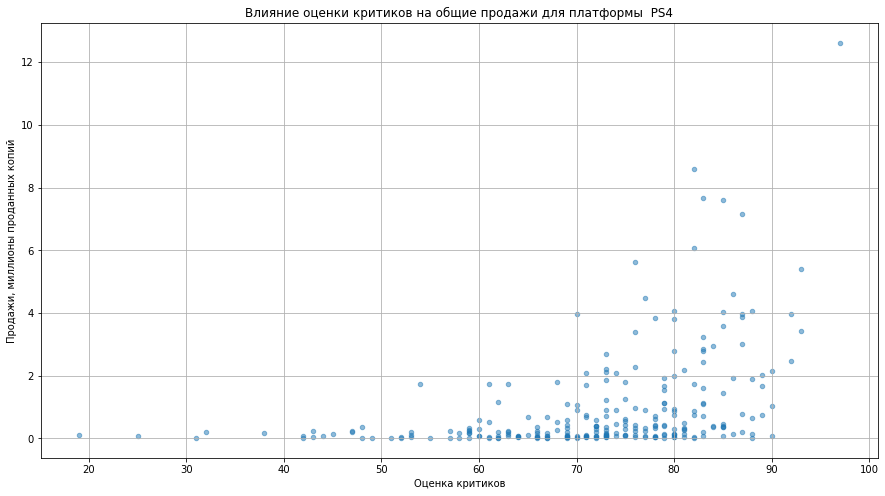

In [42]:
data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 8), \
                                     alpha=0.5, xlabel='Оценка критиков', ylabel='Продажи, миллионы проданных копий') \
.set_title('Влияние оценки критиков на общие продажи для платформы  PS4')
plt.show()

Посчитаем к.оэффициент корреляции.

In [43]:
data.query('platform == "PS4"')['total_sales'].corr(data.query('platform == "PS4"')['critic_score'])

0.40656790206178123

Сделаем то же самое для оценки пользователей.

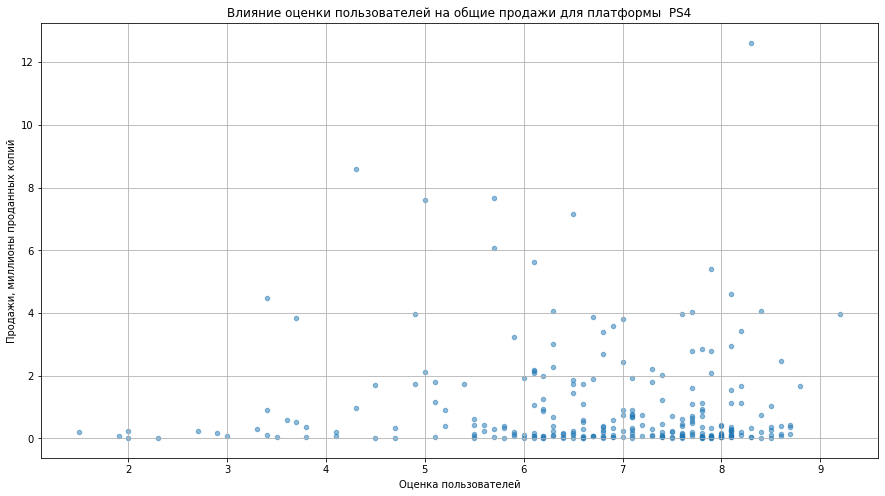

In [44]:
data.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 8), alpha=0.5, \
                                    xlabel='Оценка пользователей', ylabel='Продажи, миллионы проданных копий') \
.set_title('Влияние оценки пользователей на общие продажи для платформы  PS4')
plt.show()

Коээфициент корреляции:

In [45]:
data.query('platform == "PS4"')['total_sales'].corr(data.query('platform == "PS4"')['user_score'])

-0.03195711020455643

Видим слабую прямую связь оценки критиков и пользователей на продажи игр. Оценка критиков всё же влияет сильнее.

### Влияние отзывов пользователей и критиков на продажи внутри остальных популярных платформ. 

Построим аналогичные графики и рассчитаем коэффициент корреляции для остальных потенциально прибыльных платформ:

Рассмотрим платформу PS4
Корреляция между продажами игр на платформе PS4 и отзывами критиков 0.40656790206178123


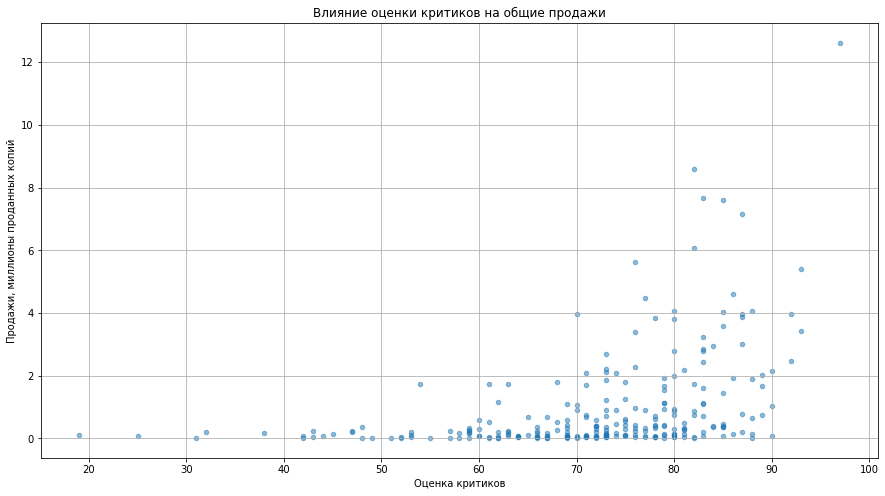

Корреляция между продажами игр на платформе PS4 и отзывами пользователей -0.03195711020455643


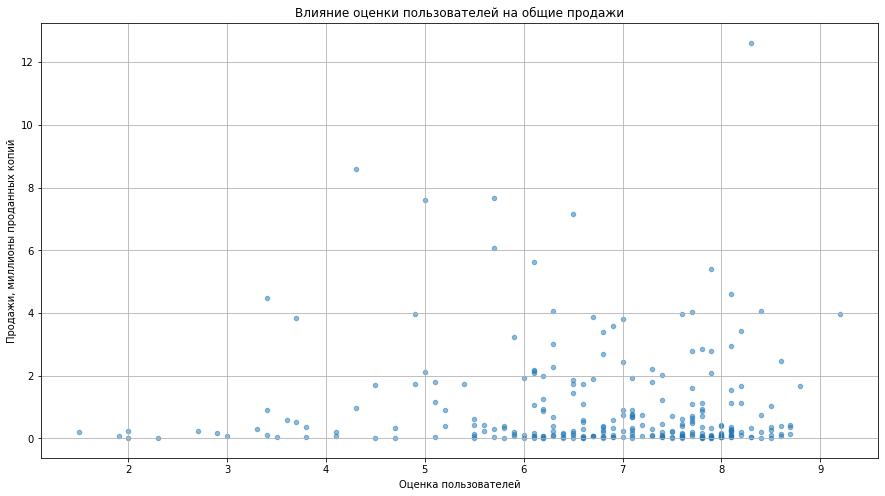




Рассмотрим платформу XOne
Корреляция между продажами игр на платформе XOne и отзывами критиков 0.41699832800840153


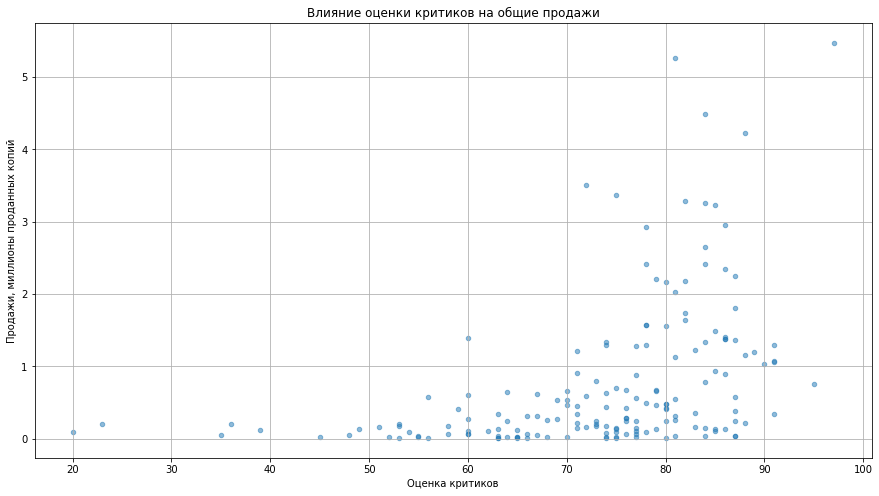

Корреляция между продажами игр на платформе XOne и отзывами пользователей -0.06892505328279418


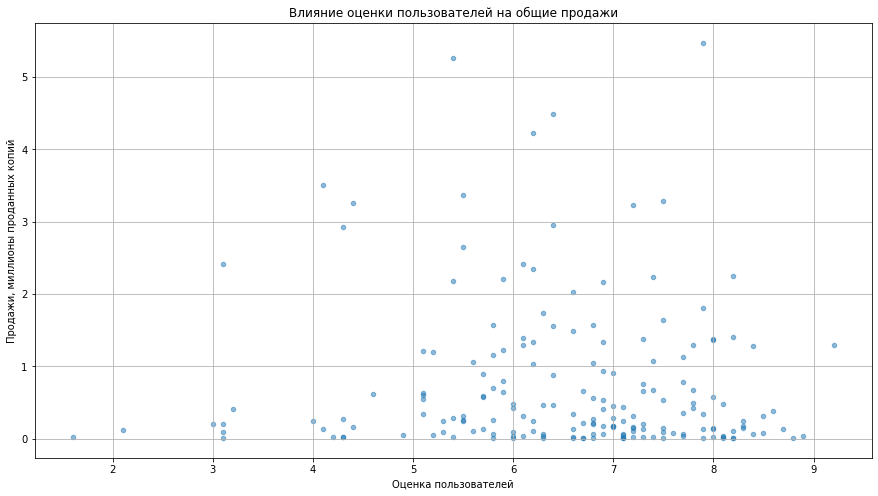




Рассмотрим платформу 3DS
Корреляция между продажами игр на платформе 3DS и отзывами критиков 0.3570566142288104


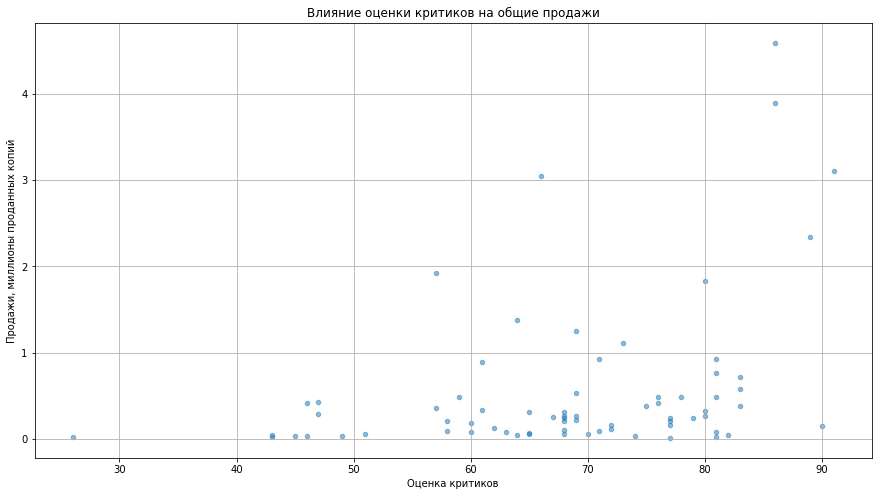

Корреляция между продажами игр на платформе 3DS и отзывами пользователей 0.24150411773563002


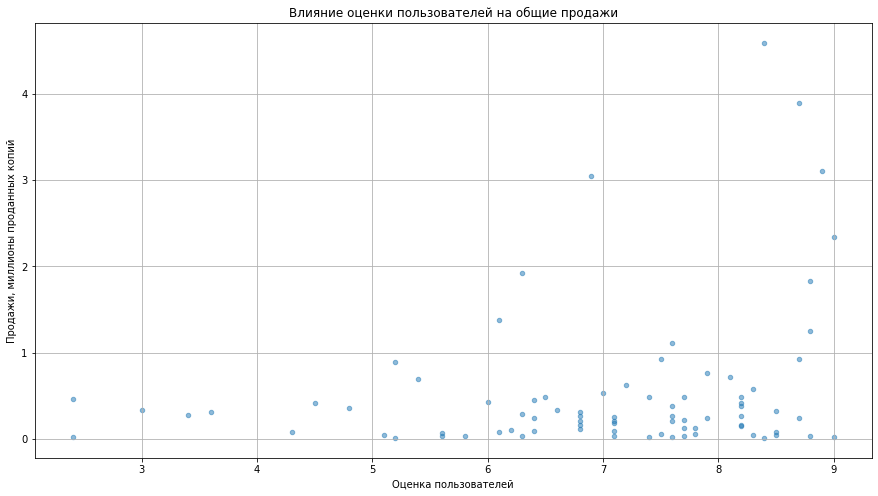




Рассмотрим платформу PC
Корреляция между продажами игр на платформе PC и отзывами критиков 0.19603028294369368


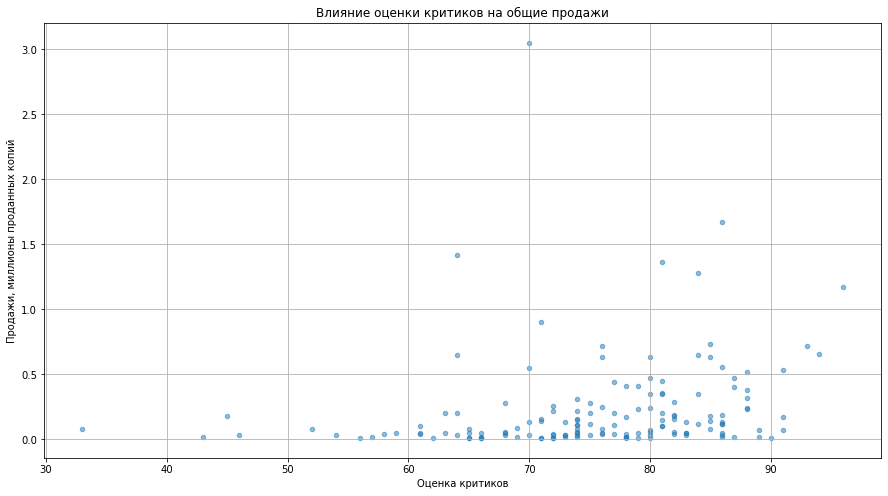

Корреляция между продажами игр на платформе PC и отзывами пользователей -0.09384186952476747


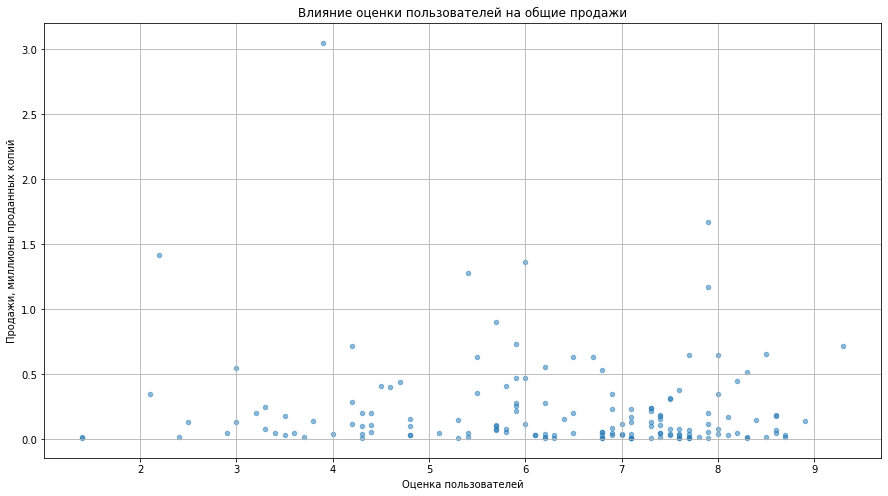

In [46]:
for i in best_platforms:
    print ('Рассмотрим платформу', i)
    print ('Корреляция между продажами игр на платформе', i, 'и отзывами критиков', data.query('platform == @i')['total_sales'] \
           .corr(data.query('platform == @i')['critic_score']))  
    data.query('platform == @i').plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 8), alpha=0.5, \
                                      xlabel='Оценка критиков', ylabel='Продажи, миллионы проданных копий') \
    .set_title('Влияние оценки критиков на общие продажи')
    plt.show()
    print ('Корреляция между продажами игр на платформе', i, 'и отзывами пользователей', data.query('platform == @i') \
           ['total_sales'].corr(data.query('platform == @i')['user_score']))
    data.query('platform == @i').plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(15, 8), alpha=0.5, \
                                     xlabel='Оценка пользователей', ylabel='Продажи, миллионы проданных копий') \
    .set_title('Влияние оценки пользователей на общие продажи')
    plt.show()
    print('')
    print('')
    print('')

По всем платформам схожая ситуация. По графикам видим слабую прямую связь между отзывами критиков и продажами. Коэффициент корреляции это подтверждает. 
Ситуация с отзывами пользователей сложнее. Коэффициенты корреляции не говорят о наличии зависимости. Однако по графикам небольшая взаимосвязь всё же прослеживается: в целом у игр с более высоким рейтингом пользователей продажи выше. Видимо, на коэффициент корреляции сильно влияют выбросы: мнения пользователей имеют больший разброс, чем отзывы критиков. Скорее всего, профессиональные критики оценивают игры более комплексно и объективно, у них есть ряд критериев, которые влияют на оценку. Отзывы пользователей же больше основаны на эмоциях "нравится -- не нравится".

### Общее распределение игр по жанрам. 

Посчитаем для каждого жанра количество выпущенных игр и их проданных копий.

In [47]:
data_genre = data.groupby('genre').agg({'name': 'count', 'total_sales': ['sum', 'median']}) 
data_genre.columns = data_genre.columns.droplevel(0)
data_genre

,count,sum,median
genre,,,
Action,766,321.87,0.110
Adventure,245,23.64,0.030
Fighting,80,35.31,0.125
Misc,155,62.82,0.100
Platform,74,42.63,0.225
Puzzle,17,3.17,0.060
Racing,85,39.89,0.120
Role-Playing,292,145.89,0.125
Shooter,187,232.98,0.450


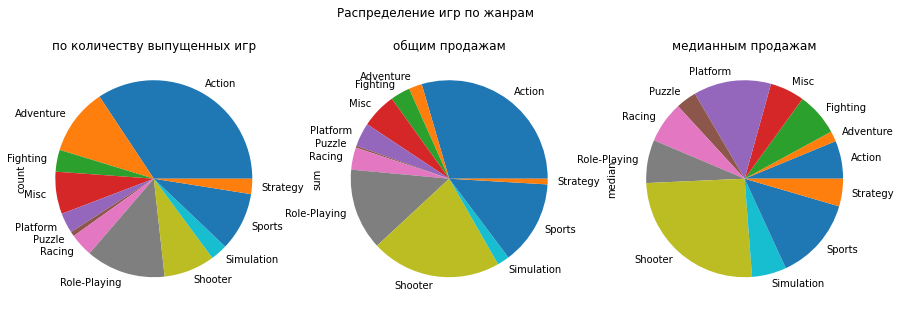

In [48]:
fig,axis = plt.subplots(nrows=1 , ncols=3, figsize=(15, 5))
fig.suptitle('Распределение игр по жанрам')
axis[0].set_title('по количеству выпущенных игр')
data_genre.plot(y='count', kind='pie', legend=False, ax=axis[0])
axis[1].set_title('общим продажам')
data_genre.plot(y='sum', kind='pie', legend=False, ax=axis[1])
axis[2].set_title('медианным продажам')
data_genre.plot(y='median', kind='pie', legend=False, ax=axis[2])
plt.show()

Построим диаграммы размаха продаж по жанрам.

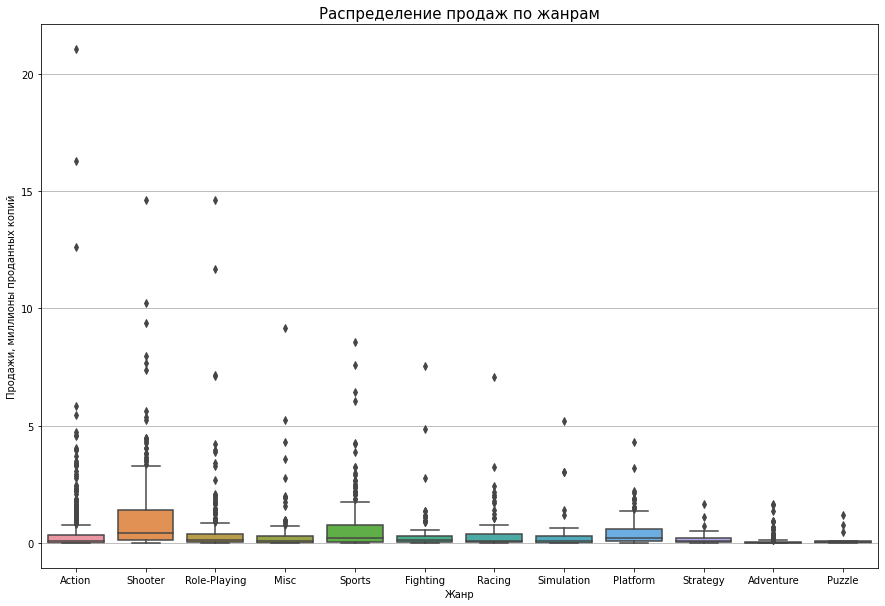

In [49]:
line,ax = plt.subplots(figsize=(15, 10))
seaborn.boxplot(x='genre', y='total_sales', data=data) 
ax.set_title('Распределение продаж по жанрам', fontsize=15)
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи, миллионы проданных копий')
plt.show()

Приблизим график.

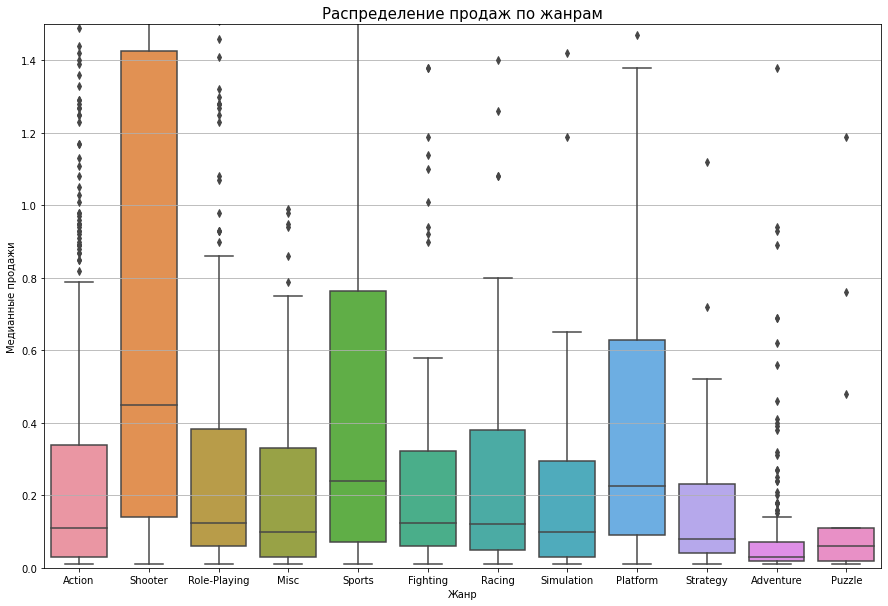

In [50]:
line,ax = plt.subplots(figsize=(15, 10))
seaborn.boxplot(x='genre', y='total_sales', data=data) #_genre.reset_index()
ax.set_title('Распределение продаж по жанрам', fontsize=15)
ax.set_xlabel('Жанр')
ax.set_ylabel('Медианные продажи')
plt.ylim(0,1.5)
plt.show()

Больше всего игр выпускается в жанре Action (примерно треть), далее идут Role-Playin, Adventure и Sports. 
Если посмотреть на медианные продажи, видим, что на первом месте с большим отрывом жанр Shooter, далее идут жанры Sports и Platform. Наименее прибыльные -- Adventure (хотя выпускают их довольно много) и Puzzle. Игр в жанре Action выходит больше всего, их общая продажа также самая высокая, однако медианная -- одна из самых низких. Возможно, игра "выстреливает" на каких-то определнных платформах. 

## Этап 4. Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) для каждого региона (NA, EU, JP).

Сгруппируем продажи в каждом регионе по платформам и построим по ним диаграммы:

In [51]:
platforms_na = data.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False) 
platforms_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [52]:
platforms_na.loc['other', 'na_sales'] = platforms_na.iloc[5:].sum()[0] # отправляем платформы не из топ-5 в группу "другие"
platforms_na = platforms_na.reset_index()
platforms_na

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.11
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


In [53]:
platforms_na = platforms_na.drop(index=[5, 6, 7, 8, 9, 10]) # удаляем платформы не из топ-5
platforms_na = platforms_na.set_index('platform')
platforms_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
other,52.49


In [54]:
platforms_eu = data.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False) 
platforms_eu.loc['other', 'eu_sales'] = platforms_eu.iloc[5:].sum()[0]
platforms_eu = platforms_eu.reset_index()
platforms_eu = platforms_eu.drop(index=[5, 6, 7, 8, 9, 10])
platforms_eu = platforms_eu.set_index('platform')
platforms_eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
other,58.26


In [55]:
platforms_jp = data.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False) 
platforms_jp.loc['other', 'jp_sales'] = platforms_jp.iloc[5:].sum()[0]
platforms_jp = platforms_jp.reset_index()
platforms_jp = platforms_jp.drop(index=[5, 6, 7, 8, 9, 10])
platforms_jp = platforms_jp.set_index('platform')
platforms_jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
other,4.19


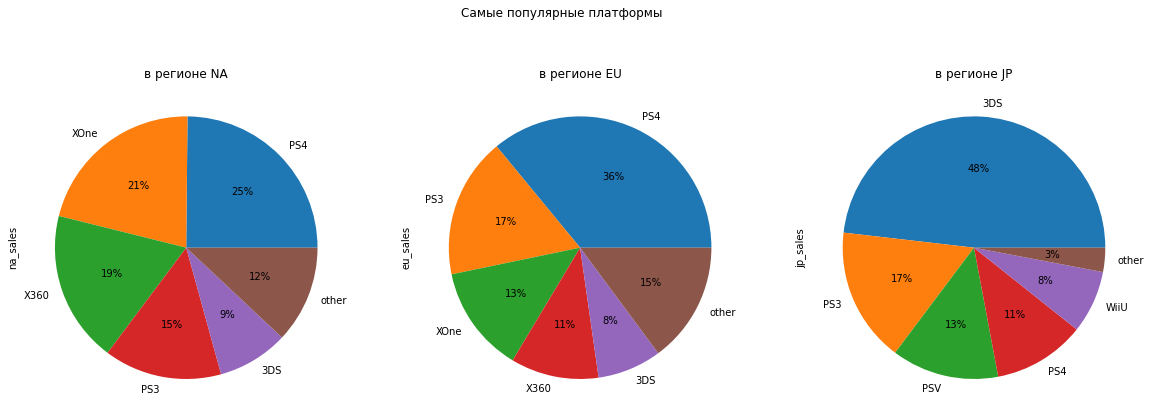

In [56]:
fig,axis = plt.subplots(nrows=1 , ncols=3, figsize=(20, 7))
fig.suptitle('Самые популярные платформы')
axis[0].set_title('в регионе NA')
platforms_na.plot(y='na_sales', kind='pie', legend=False, ax=axis[0], autopct='%1.0f%%') 
axis[1].set_title('в регионе EU')
platforms_eu.plot(y='eu_sales', kind='pie', legend=False, ax=axis[1], autopct='%1.0f%%')
axis[2].set_title('в регионе JP')
platforms_jp.plot(y='jp_sales', kind='pie', legend=False, ax=axis[2], autopct='%1.0f%%')
plt.show()

В Северной Америке и Европе топ-5 платформ совпадает, но различаются доли. А вот в Японии в топе появляются PSV и WiiU, а Х360 и ХОne нет. В целом в Японии топ-5 платформ покрывают практически весь рынок (97%).

### Самые популярные жанры (топ-5) для каждого региона (NA, EU, JP).

Проделаем то же самое для распределения по жанрам.

In [57]:
genre_na = data.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False) 
genre_na

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [58]:
genre_na.loc['other', 'na_sales'] = genre_na.iloc[5:].sum()[0]
genre_na = genre_na.reset_index()
genre_na

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


In [59]:
genre_na = genre_na.drop(index=[5, 6, 7, 8, 9, 10, 11])
genre_na = genre_na.set_index('genre')
genre_na

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
other,62.76


In [60]:
genre_eu = data.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False) 
genre_eu.loc['other', 'eu_sales'] = genre_eu.iloc[5:].sum()[0]
genre_eu = genre_eu.reset_index()
genre_eu = genre_eu.drop(index=[5, 6, 7, 8, 9, 10, 11])
genre_eu = genre_eu.set_index('genre')
genre_eu

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
other,68.56


In [61]:
genre_jp = data.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False) 
genre_jp.loc['other', 'jp_sales'] = genre_jp.iloc[5:].sum()[0]
genre_jp = genre_jp.reset_index()
genre_jp = genre_jp.drop(index=[5, 6, 7, 8, 9, 10, 11])
genre_jp = genre_jp.set_index('genre')
genre_jp

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
other,25.79


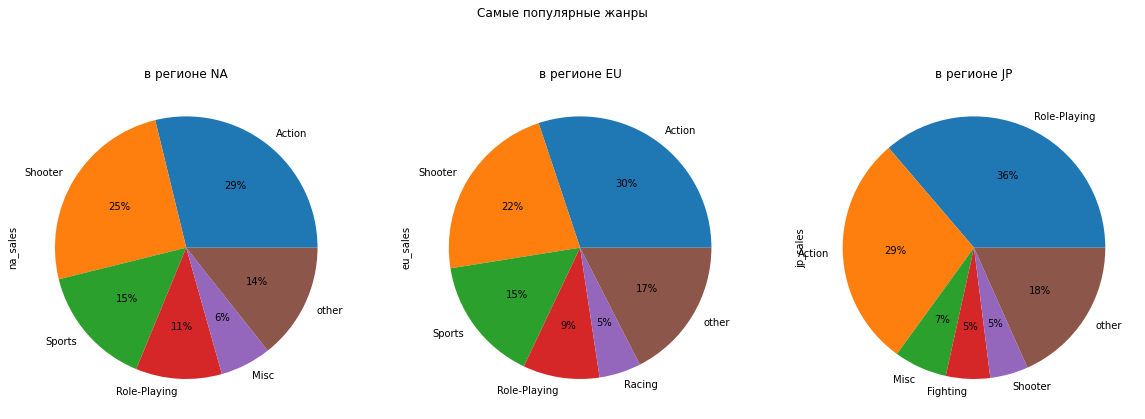

In [62]:
fig,axis = plt.subplots(nrows=1 , ncols=3, figsize=(20, 7))
fig.suptitle('Самые популярные жанры')
axis[0].set_title('в регионе NA')
genre_na.plot(y='na_sales', kind='pie', legend=False, ax=axis[0], autopct='%1.0f%%') 
axis[1].set_title('в регионе EU')
genre_eu.plot(y='eu_sales', kind='pie', legend=False, ax=axis[1], autopct='%1.0f%%')
axis[2].set_title('в регионе JP')
genre_jp.plot(y='jp_sales', kind='pie', legend=False, ax=axis[2], autopct='%1.0f%%')
plt.show()

И снова такая же ситуация: в Северной Америке и Европе популярны почти одни и те же жанры (даже расхождение в долях минимальное), а у Японцев другие вкусы: на первом месте Role-Playing, Shooter менее популярен, чем в Европе и Америке, а Fighting более.

### Влияние рейтинга ESRB на продажи в отдельном регионе.

Посмотрим на распределение игр по возрастному ограничению.

In [63]:
regions_rating = data.pivot_table(index='rating', aggfunc=({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}))
regions_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
unknown,78.91,85.05,89.42


«E» («Everyone») — «Для всех»;  

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше;

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;

«M» («Mature») — «Для взрослых»,

"unknown" — рейтинг не известиен.

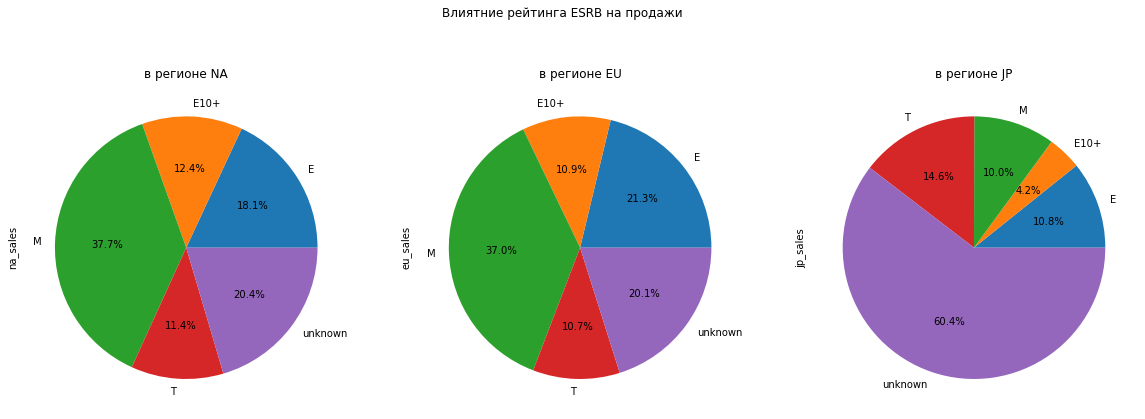

In [64]:
fig,axis = plt.subplots(nrows=1 , ncols=3, figsize=(20, 7))
fig.suptitle('Влиятние рейтинга ESRB на продажи')
axis[0].set_title('в регионе NA')
regions_rating.plot(y='na_sales', kind='pie', legend=False, ax=axis[0], autopct='%1.1f%%')
axis[1].set_title('в регионе EU')
regions_rating.plot(y='eu_sales', kind='pie', legend=False, ax=axis[1], autopct='%1.1f%%')
axis[2].set_title('в регионе JP')
regions_rating.plot(y='jp_sales', kind='pie', legend=False, ax=axis[2], autopct='%1.1f%%')
plt.show()

Довольно много игр без указания возрастного рейтинга, особенно в Японии. Посмотрим на распределение без них.

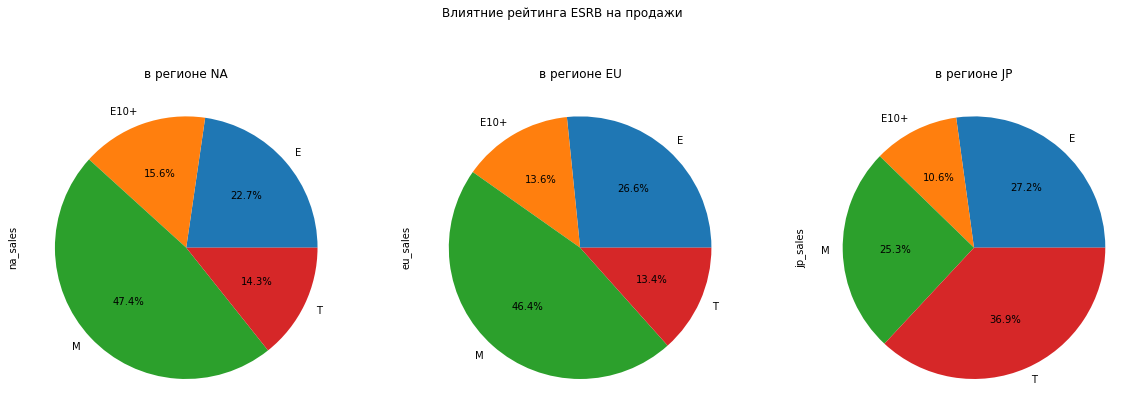

In [65]:
fig,axis = plt.subplots(nrows=1 , ncols=3, figsize=(20, 7))
fig.suptitle('Влиятние рейтинга ESRB на продажи')
axis[0].set_title('в регионе NA')
regions_rating.query('rating != "unknown"').plot(y='na_sales', kind='pie', legend=False, ax=axis[0], autopct='%1.1f%%')
axis[1].set_title('в регионе EU')
regions_rating.query('rating != "unknown"').plot(y='eu_sales', kind='pie', legend=False, ax=axis[1], autopct='%1.1f%%')
axis[2].set_title('в регионе JP')
regions_rating.query('rating != "unknown"').plot(y='jp_sales', kind='pie', legend=False, ax=axis[2], autopct='%1.1f%%')
plt.show()

Итак, пользователи Северной Америки и Европы практически не различаются: они выбирают почти и те же жанры (Action, Shooter, Sports, Role-Playing) и одни и те же платформы (PS4, XOne, X360, PS3, 3DS). Только американцы больше евопейцев предпочитают Х360, а европейцы -- PS4. Большая часть игр -- для взрослой категории.

Типичный японец же значительно отличается: он больше предпочитает портативные игры, а из жанров выбирает Role-Playing и не так сильно любит Shooter. 

О возрастном рейтинге в Японии трудно судить по причине того, что рейтинг ESRB предназначен для игр Северной Америки. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке. 

## Этап 5. Проверка гипотез

### Сравнение средних пользовательских рейтингов платформ Xbox One и PC.

Сформулируем гипотезы: 

- нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

Выделим данные по платформам и отфильтруем пропуски в рейтинге.

In [66]:
data_xone = data[(data['platform'] =='XOne') & (~data['user_score'].isna())]['user_score']
data_xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [67]:
data_pc = data[(data['platform'] =='PC') & (~data['user_score'].isna())]['user_score']
data_pc

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64

Сравниваемые совокупности разных размеров, поэтому укажем параметр equal_var = False. Уровень значимости выберем 0.05, так как размер выборок небольшой. 

Мы сравниваем средние двух совокупностей, которые не зависимы между собой, поэтому воспользуемся методом ttest_ind.

In [78]:
results = st.ttest_ind(data_xone, data_pc, equal_var=False) # вызов метода для проверки гипотезы

alpha = 0.05 # значение уровня значимости

# вывод значения p-value на экран 
print('p-value', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('На уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений \
    пользовательских рейтингов платформ Xbox One и PC в пользу альтернативной гипотезы.')
else:
    print('На уровне значимости 5% нет оснований отвергнуть нулевую гипотезу о равенстве средних значений \
    пользовательских рейтингов платформ Xbox One и PC в пользу альтернативной гипотезы.') 
    
print('Средний пользовательский рейтинг платформы Xbox One:', data_xone.mean())
print('Средний пользовательский рейтинг платформы PC:', data_pc.mean())

p-value 0.14759594013430463
На уровне значимости 5% нет оснований отвергнуть нулевую гипотезу о равенстве средних значений     пользовательских рейтингов платформ Xbox One и PC в пользу альтернативной гипотезы.
Средний пользовательский рейтинг платформы Xbox One: 6.52142857142857
Средний пользовательский рейтинг платформы PC: 6.269677419354836


### Сравнение средних пользовательских рейтингов жанров Action и Sports .

Сформулируем гипотезы: 

- нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые;

- альтернативная гипотеза:- средние пользовательские рейтинги жанров Action и Sports разные.

In [70]:
data_action = data[(data['genre'] =='Action') & (~data['user_score'].isna())]['user_score']
data_action

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 389, dtype: float64

In [71]:
data_sports = data[(data['genre'] =='Sports') & (~data['user_score'].isna())]['user_score']
data_sports

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 160, dtype: float64

Сравниваемые совокупности разных размеров, поэтому укажем параметр equal_var = False. Уровень значимости выберем 0.05, так как размер выборок небольшой. 

Мы сравниваем средние двух совокупностей, которые не зависимы между собой, поэтому воспользуемся методом ttest_ind.

In [77]:
results = st.ttest_ind(data_action, data_sports, equal_var=False) # вызов метода для проверки гипотезы

alpha = 0.05 # значение уровня значимости

# вывод значения p-value на экран 
print('p-value', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('На уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений \
    пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы.')
else:
    print('На уровне значимости 5% нет оснований отвергнуть нулевую гипотезу о равенстве средних значений \
    пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы.') 
    
print('Средний пользовательский рейтинг жанра Action:', data_action.mean())
print('Средний пользовательский рейтинг жанра Sports:', data_sports.mean())

p-value 1.4460039700704315e-20
На уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений     пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы.
Средний пользовательский рейтинг жанра Action: 6.837532133676097
Средний пользовательский рейтинг жанра Sports: 5.238124999999999


## Этап 6. Общий вывод

Мы изучили данные о рынке компьютерных игр на основе исторических данных о продажах игр из открытых источников.

В процессе предобработки были выявлены пропуски в данных, осуществлены замены пропусков, изменены некоторые типы данных на подходящие, подкорректированны названия столбцов. Пропуски в данных рейтинга ESRB связаны с тем, что эта организация появилась в 1994 году, а наши данные с 1980 года.

Для дальнейшего анализа посчитали суммарные продажи по регионам и добавили их в таблицу.

Проведен исследовательский анализ данных. Посмотрели динамику выпуска игр в разные годы, динамику продаж по платформам. Определили, что в среднем платформы "живут" около 10 лет: 5 лет идет рост продаж, потом спад. На основании этого за актуальный период взяли данные с 2013 года. Выявили потенциально прибыльные платформы -- это 'PS4', 'XOne', '3DS' и 'PC'. С помощью диаграммы размаха выявили, что портативные консоли в среднем менее популярны. Самые прибыльные платформы -- это 'PS4' и 'Х360'. Отличается картина по 'PC': в отличие от остальных платформ, игры на нем стабильно продаются на протяжении многих лет, хотя продажи не такие высокие, возможно, по причине пиратства. 

Провели анализ взаимосвязи отзывов критиков и пользователей с общими продажами. Выяснилось, что отзывы критиков больше влияют на продажи игр, чем отзывы самих пользователей. Скорее всего, причина в более комплексном и объективном подходе со стороны профессиональных критиков. 

Самые продаваемые игры жанров Action, Shooter, Sports и Role-Playing.

Составили портреты пользователей для каждого региона. Оказалось, что пользователи из Северной Америки и Европы очень похожи: у них популярны примерно одни те же платформы и жанры. А вот пользователи из Японии сильно отличаются: они больше предпочитают портативные консоли и другие жанры. 

По результатам статистического анализы выявили, что средние пользовательские рейтинги платформ Xbox One и PC равны, а средние пользовательские рейтинги жанров Action и Sports разные.

По итогам исследования предлагаю сделать ставку в 2017 году на игры на платформах PS4 и XOne (они находятся на стадии роста популярности) жанров Shooter и Action (а в Японии лучше Role-Playing) для взрослой возрастной категории. На отзывы профессиональных критиков стоит ориентироваться больше, чем на отзывы пользователей.